# Austin_Animal_Center_Machine_Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
combined = pd.read_csv('aac_intakes_outcomes.csv')

In [3]:
#combined.info()

In [4]:
#select columns
combined = combined[['outcome_type','animal_type','intake_condition','intake_type','age_upon_intake_age_group']]

In [5]:
#Drop missing value
combined = combined.dropna()

In [6]:
combined.outcome_type.value_counts()

Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: outcome_type, dtype: int64

In [7]:
#drop the rows with rare situations
combined = combined.loc[(combined.outcome_type == 'Adoption') | (combined.outcome_type == 'Transfer') | (combined.outcome_type == 'Return to Owner') | (combined.outcome_type == 'Euthanasia')]

In [8]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78428 entries, 0 to 79671
Data columns (total 5 columns):
outcome_type                 78428 non-null object
animal_type                  78428 non-null object
intake_condition             78428 non-null object
intake_type                  78428 non-null object
age_upon_intake_age_group    78428 non-null object
dtypes: object(5)
memory usage: 3.6+ MB


In [9]:
combined.outcome_type.value_counts()

Adoption           33594
Transfer           23799
Return to Owner    14791
Euthanasia          6244
Name: outcome_type, dtype: int64

# Model to predict the outcome of animals

In [10]:
#sample features and labels
X = combined[['animal_type','intake_condition','intake_type','age_upon_intake_age_group']]
y = combined.outcome_type

In [11]:
#get dummy variable
from sklearn import preprocessing

#encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()

,animal_type,intake_condition,intake_type,age_upon_intake_age_group
0,2,3,3,9
1,2,3,2,8
2,2,3,2,8
3,2,3,1,9
4,2,2,2,3


In [12]:
#INSTANTIATE
enc = preprocessing.OneHotEncoder(categories='auto')

#Fit
enc.fit(X_2)

#Transform
X_ohe = enc.transform(X_2).toarray()
X_ohe

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

# K-Nearest Neighbors 

In [13]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV


In [14]:
#split train and test data with cross validation
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y,test_size=0.8,random_state=21,stratify=y)

In [16]:
#train KNeighbors model
param_grid={'n_neighbors':np.arange(1,30)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_,knn_cv.best_score_)

({'n_neighbors': 27}, 0.5691424928275423)


K=27 has the best accurate rate which is 57%.

In [59]:
#Use test group to check accuracy of the model

from sklearn.metrics import accuracy_score

#Train model with best parameter
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)

#predict test data
y_predict=knn.predict(X_test)

score = accuracy_score(y_predict,y_test)
print('The accuracy score is '+str(score))

The accuracy score is 0.57043813652519


The accuracy score for test data is consistent, which is 57%

In [26]:
#confusion materics

from sklearn.metrics import classification_report,confusion_matrix

confusion1=confusion_matrix(y_predict,y_test)
classifiction1=classification_report(y_predict,y_test)

print('Confusion matrix:\n',confusion1)
print('Classifiction report:\n',classifiction1)

Confusion matrix:
 [[16490   842  4393  7052]
 [  409  3135   184   454]
 [ 2662   392  6437  1804]
 [ 7315   626   819  9729]]
Classifiction report:
                  precision    recall  f1-score   support

       Adoption       0.61      0.57      0.59     28777
     Euthanasia       0.63      0.75      0.68      4182
Return to Owner       0.54      0.57      0.56     11295
       Transfer       0.51      0.53      0.52     18489

       accuracy                           0.57     62743
      macro avg       0.57      0.60      0.59     62743
   weighted avg       0.57      0.57      0.57     62743



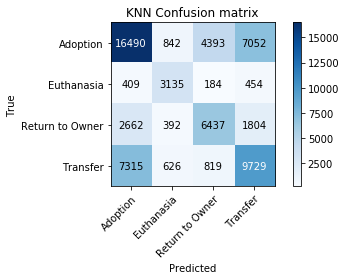

In [46]:
# plot comfusion matrix

from sklearn.utils.multiclass import unique_labels

fig, ax = plt.subplots()
im = ax.imshow(confusion1, interpolation='nearest',cmap="Blues")
ax.figure.colorbar(im, ax=ax)
classes = unique_labels(y_predict,y_test)
ax.set(xticks=np.arange(confusion1.shape[1]),yticks=np.arange(confusion1.shape[0]),xticklabels=classes, yticklabels=classes, title='KNN Confusion matrix', ylabel='True',xlabel='Predicted')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = confusion1.max() / 2
for i in range(confusion1.shape[0]):
        for j in range(confusion1.shape[1]):
            ax.text(j, i, format(confusion1[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion1[i, j] > thresh else "black")
fig.tight_layout()

# RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
#train RandomForest Model
estimators=[10,100,300,500,800,1000]
criterions=['gini','entropy']
grid_param_rf={'n_estimators':estimators,'criterion':criterions,'bootstrap':[True,False]}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,grid_param_rf,cv=5)
rf_cv.fit(X_train,y_train)

print(rf_cv.best_params_,rf_cv.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 800} 0.5813197322282435


The parameter with best score is n_estimator=1000,bootstrap=True,criterion='gini'. The optimized score is 58%

In [60]:
#Check the test data accuracy score

#train modelwith best paramter
rf=RandomForestClassifier(n_estimators=1000,criterion='gini',bootstrap=True)
rf.fit(X_train,y_train)

#predict the test data
y_predict=rf.predict(X_test)

score = accuracy_score(y_predict,y_test)
print('The accuracy score is: '+str(score))

The accuracy score is: 0.5764308369061091


The test data has similar accuracy, which is 58%

In [48]:
#confusion materics

confusion2=confusion_matrix(y_predict,y_test)
classifiction2=classification_report(y_predict,y_test)

print('Confusion matrix:\n',confusion2)
print('Classifiction report:\n',classifiction2)

Confusion matrix:
 [[16664   653  4423  6991]
 [  394  3277   153   507]
 [ 2621   377  6490  1781]
 [ 7197   688   767  9760]]
Classifiction report:
                  precision    recall  f1-score   support

       Adoption       0.62      0.58      0.60     28731
     Euthanasia       0.66      0.76      0.70      4331
Return to Owner       0.55      0.58      0.56     11269
       Transfer       0.51      0.53      0.52     18412

       accuracy                           0.58     62743
      macro avg       0.58      0.61      0.60     62743
   weighted avg       0.58      0.58      0.58     62743



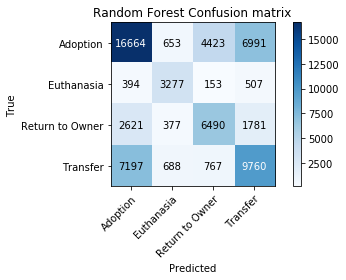

In [49]:
# plot comfusion matrix

from sklearn.utils.multiclass import unique_labels

fig, ax = plt.subplots()
im = ax.imshow(confusion2, interpolation='nearest',cmap="Blues")
ax.figure.colorbar(im, ax=ax)
classes = unique_labels(y_predict,y_test)
ax.set(xticks=np.arange(confusion2.shape[1]),yticks=np.arange(confusion2.shape[0]),xticklabels=classes, yticklabels=classes, title='Random Forest Confusion matrix', ylabel='True',xlabel='Predicted')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = confusion2.max() / 2
for i in range(confusion2.shape[0]):
        for j in range(confusion2.shape[1]):
            ax.text(j, i, format(confusion2[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion2[i, j] > thresh else "black")
fig.tight_layout()

# Support Vector Machine

In [50]:
from sklearn.svm import SVC

In [31]:
#train SVM model
Cs=[0.01,0.1,1,10]
gammas=[0.001,0.01,0.1]
kernels=['linear', 'poly', 'rbf', 'sigmoid']
param_grid_svc={'C':Cs,'kernel':kernels,'gamma':gammas}
svc=SVC()
svc_cv=GridSearchCV(svc,param_grid_svc,cv=5)
svc_cv.fit(X_train,y_train)

print(svc_cv.best_params_,svc_cv.best_score_)

({'kernel': 'rbf', 'C': 10, 'gamma': 0.1}, 0.5820210392094358)


The parameter for best score is kerner='rbf',C=10,gamma=0.1. The optimized score is 58%.

In [87]:
#Check the test data accuracy score

#train modelwith best paramter
svc=SVC(C=10,kernel='rbf',gamma=0.1,probability=True)
svc.fit(X_train,y_train)

#predict the test data
y_predict=svc.predict(X_test)

score = accuracy_score(y_predict,y_test)
print('The accuracy score is: '+str(score))

The accuracy score is: 0.5774668090464274


The test data has similar accuracy, which is 58%

In [53]:
#confusion matrix

confusion3=confusion_matrix(y_predict,y_test)
classifiction3=classification_report(y_predict,y_test)

print('Confusion matrix:\n',confusion3)
print('Classifiction report:\n',classifiction3)

Confusion matrix:
 [[16629   637  4386  6953]
 [  369  3260   142   470]
 [ 2617   349  6483  1756]
 [ 7261   749   822  9860]]
Classifiction report:
                  precision    recall  f1-score   support

       Adoption       0.62      0.58      0.60     28605
     Euthanasia       0.65      0.77      0.71      4241
Return to Owner       0.55      0.58      0.56     11205
       Transfer       0.52      0.53      0.52     18692

       accuracy                           0.58     62743
      macro avg       0.58      0.61      0.60     62743
   weighted avg       0.58      0.58      0.58     62743



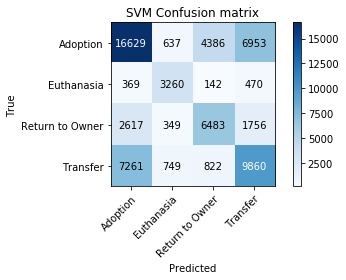

In [54]:
# plot comfusion matrix

from sklearn.utils.multiclass import unique_labels

fig, ax = plt.subplots()
im = ax.imshow(confusion3, interpolation='nearest',cmap="Blues")
ax.figure.colorbar(im, ax=ax)
classes = unique_labels(y_predict,y_test)
ax.set(xticks=np.arange(confusion3.shape[1]),yticks=np.arange(confusion3.shape[0]),xticklabels=classes, yticklabels=classes, title='SVM Confusion matrix', ylabel='True',xlabel='Predicted')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = confusion3.max() / 2
for i in range(confusion3.shape[0]):
        for j in range(confusion3.shape[1]):
            ax.text(j, i, format(confusion3[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion3[i, j] > thresh else "black")
fig.tight_layout()

# Model Stacking

In [ ]:
#combine the result of 3 basic model

In [100]:
y_new = combined[['outcome_type']]
y_new_2 = le.fit_transform(y_new)

/Users/elisechen/anaconda3/envs/TestEnv/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
knn_pred = pd.DataFrame(knn.predict_proba(X_ohe))
rf_pred = pd.DataFrame(rf.predict_proba(X_ohe))
svc_pred = pd.DataFrame(svc.predict_proba(X_ohe))

In [128]:
X_new = pd.concat((knn_pred,rf_pred,svc_pred),axis=1)

In [129]:
#split train and test data with cross validation
new_X_train,new_X_test,new_y_train,new_y_test = train_test_split(X_new,y_new_2,test_size=0.8,random_state=21,stratify=y)

In [130]:
from sklearn.linear_model import LogisticRegression

Cs=[0.01,0.1,1,10]
param_grid_logreg={'C':Cs,'multi_class':['auto'],'solver':['lbfgs'],'max_iter':[1000,5000,10000]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid_logreg,cv=5)
logreg_cv.fit(new_X_train,new_y_train)
print(logreg_cv.best_params_,logreg_cv.best_score_)

{'C': 10, 'max_iter': 1000, 'multi_class': 'auto', 'solver': 'lbfgs'} 0.5881415364998406


In [138]:
#train the second model
model=LogisticRegression(C=10,multi_class='auto',solver='lbfgs',max_iter=1000)
model.fit(new_X_train,new_y_train)
prediction=model.predict(X_new)
model_score=accuracy_score(y_new_2,prediction)
print("The accuracy socre of second model is "+str(model_score))

The accuracy socre of second model is 0.5771663181516805


In [144]:
print('Confusion matrix:\n',confusion_matrix(y_new_2,prediction))
print('Classifiction report:\n',classification_report(y_new_2,prediction))

Confusion matrix:
 [[20806   235  3168  9385]
 [  799  3719   451  1275]
 [ 5496   161  7987  1147]
 [ 8604   379  2062 12754]]
Classifiction report:
               precision    recall  f1-score   support

           0       0.58      0.62      0.60     33594
           1       0.83      0.60      0.69      6244
           2       0.58      0.54      0.56     14791
           3       0.52      0.54      0.53     23799

    accuracy                           0.58     78428
   macro avg       0.63      0.57      0.60     78428
weighted avg       0.58      0.58      0.58     78428



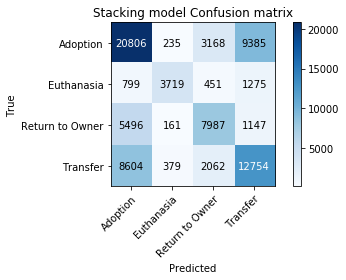

In [145]:
# plot comfusion matrix

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix(y_new_2,prediction), interpolation='nearest',cmap="Blues")
ax.figure.colorbar(im, ax=ax)
classes = unique_labels(y_predict,y_test)
ax.set(xticks=np.arange(confusion_matrix(y_new_2,prediction).shape[1]),yticks=np.arange(confusion_matrix(y_new_2,prediction).shape[0]),xticklabels=classes, yticklabels=classes, title='Stacking model Confusion matrix', ylabel='True',xlabel='Predicted')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = confusion_matrix(y_new_2,prediction).max() / 2
for i in range(confusion_matrix(y_new_2,prediction).shape[0]):
        for j in range(confusion_matrix(y_new_2,prediction).shape[1]):
            ax.text(j, i, format(confusion_matrix(y_new_2,prediction)[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion_matrix(y_new_2,prediction)[i, j] > thresh else "black")
fig.tight_layout()